Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Data Preprocessing

Trainng Image preprocessin

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Dashboard_indicator/Training ',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode='rgb',
    batch_size =32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split= None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 257 files belonging to 29 classes.


Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Dashboard_indicator/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 29 files belonging to 29 classes.


Buiding model

In [ ]:
cnn = tf.keras.models.Sequential()

Building convolution layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #to avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
#output Layer
cnn.add(tf.keras.layers.Dense(units=29,activation='softmax'))

Compiling and training phase

In [ ]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
9/9 [==============================] - 37s 560ms/step - loss: 44.3576 - accuracy: 0.0584 - val_loss: 2.8851 - val_accuracy: 0.2759
Epoch 2/30
9/9 [==============================] - 3s 236ms/step - loss: 2.9341 - accuracy: 0.2763 - val_loss: 2.1633 - val_accuracy: 0.3793
Epoch 3/30
9/9 [==============================] - 2s 152ms/step - loss: 2.0529 - accuracy: 0.5058 - val_loss: 3.1894 - val_accuracy: 0.4138
Epoch 4/30
9/9 [==============================] - 2s 151ms/step - loss: 1.5669 - accuracy: 0.6226 - val_loss: 1.1232 - val_accuracy: 0.6897
Epoch 5/30
9/9 [==============================] - 2s 148ms/step - loss: 0.9569 - accuracy: 0.7471 - val_loss: 1.9601 - val_accuracy: 0.6207
Epoch 6/30
9/9 [==============================] - 2s 148ms/step - loss: 0.6752 - accuracy: 0.8210 - val_loss: 2.5980 - val_accuracy: 0.6552
Epoch 7/30
9/9 [==============================] - 3s 214ms/step - loss: 1.6596 - accuracy: 0.6615 - val_loss: 1.8277 - val_accuracy: 0.6552
Epoch 8/30
9/9 [==

saving model

In [ ]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
training_history.history

{'loss': [44.35755157470703,
  2.934087038040161,
  2.052891969680786,
  1.5668736696243286,
  0.9568551182746887,
  0.6752203702926636,
  1.659613013267517,
  0.6686732769012451,
  0.2683306932449341,
  0.296151727437973,
  0.5528486371040344,
  0.7325214743614197,
  0.43188127875328064,
  0.7459509372711182,
  0.7849121689796448,
  0.1590520292520523,
  0.08811620622873306,
  0.054248981177806854,
  2.0721638202667236,
  0.092314712703228,
  0.05744168907403946,
  0.16680695116519928,
  1.2696341276168823,
  0.7232145071029663,
  0.21788112819194794,
  0.03233383595943451,
  0.009387517347931862,
  0.0023854614701122046,
  0.06208428367972374,
  8.196433067321777],
 'accuracy': [0.05836575850844383,
  0.27626457810401917,
  0.505836546421051,
  0.6225680708885193,
  0.7470816969871521,
  0.8210116624832153,
  0.661478579044342,
  0.844357967376709,
  0.9377431869506836,
  0.9338521361351013,
  0.887159526348114,
  0.8949416279792786,
  0.9377431869506836,
  0.8793774247169495,
  0.88

In [ ]:
#recoding history
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Calculating accuracy of model achived on validation set

In [ ]:
print("Validation set accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set accuracy: 79.31034564971924 %


Accuracy Visualization

Training visualization

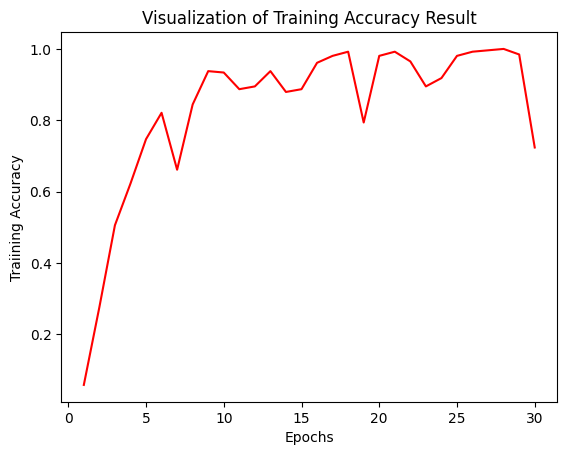

In [ ]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'], color='red')
plt.xlabel('Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

Validation accuracy

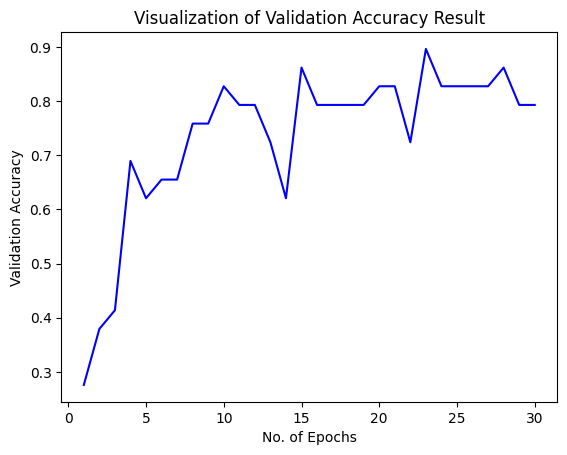

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()